Here I am visualizing the results of training and testing on Alibaba dataset

nodepiece_2

Better names are used in order to use these picture in the thesis

In [1]:
import pandas as pd
import time
import platform
import sys
import zipfile
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

seed = 1234

In [2]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [3]:
topology_df = pd.read_csv("All data/Testing Traces/topology_testing_traces/topology_testing_traces/topology_testing_traces/mean_trace_test_max.csv")
topology_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059,0.023059
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,hits_at_5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,hits_at_10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


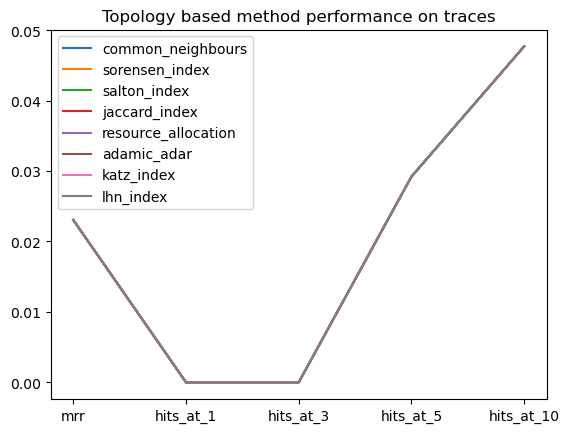

In [4]:
topology_df.plot()
x_values = topology_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on traces")
plt.show()

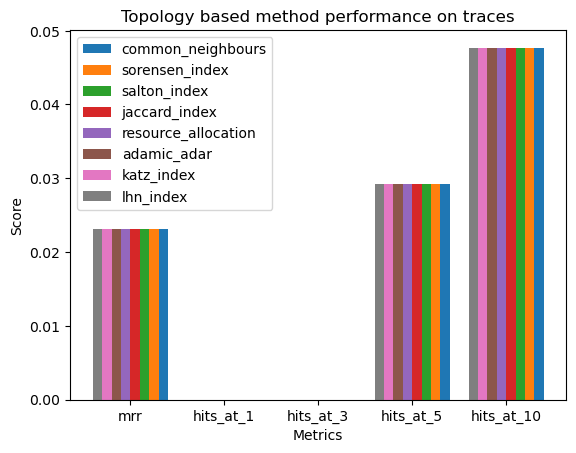

In [5]:
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on traces")
plt.legend()
plt.show()

,Metric,Common Neighbours,Sorensen Index,Salton Index,Jaccard Index,Resource Allocation,Adamic Adar,Katz Index,LHN Index
0,MRR,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873,0.019873
1,Hits@1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hits@3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hits@5,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211,0.029211
4,Hits@10,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712,0.047712


/tmp/ipykernel_28658/2155218447.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(topology_df.T.to_latex( #hrules=True,


\begin{table}[ht!]
\centering
\caption{Topology-based methods' use-case performance on min policy.}
\label{tab:topology_use_case_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &  Hits@1 &  Hits@3 &    Hits@5 &   Hits@10 \\
Common Neighbours   &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Sorensen Index      &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Salton Index        &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Jaccard Index       &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Resource Allocation &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Adamic Adar         &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
Katz Index          &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
LHN Index           &  0.019873 &     0.0 &     0.0 &  0.029211 &  0.047712 \\
\bottomrule
\end{tabular}
\

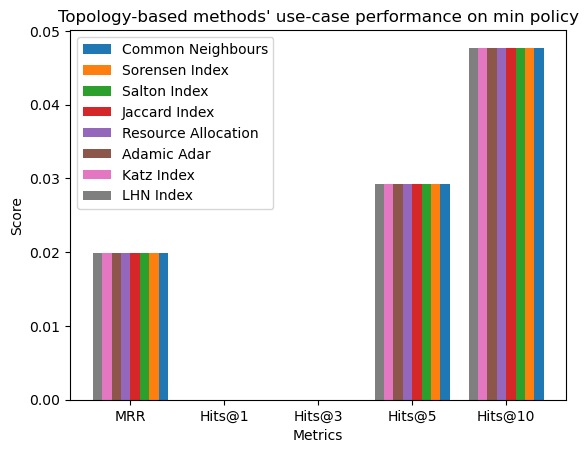

In [6]:
topology_df = pd.read_csv("All data/Testing Traces/topology_testing_traces/topology_testing_traces/mean_trace_test_min.csv")
topology_df.rename(columns={"common_neighbours": "Common Neighbours", "sorensen_index":"Sorensen Index",
                           "salton_index":"Salton Index", "jaccard_index":"Jaccard Index",
                           "resource_allocation":"Resource Allocation","adamic_adar":"Adamic Adar",
                           "katz_index":"Katz Index","lhn_index":"LHN Index","metric":"Metric"},inplace=True)
topology_df['Metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]

display(topology_df)
print(topology_df.T.to_latex( #hrules=True,
                                   label = f'tab:topology_use_case_min',
                                   caption = f'Topology-based methods\' use-case performance on min policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    ))
X_axis = np.arange(len(topology_df))+0.35
metrics = list(topology_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology-based methods' use-case performance on min policy")
plt.legend()
plt.show()

In [7]:

# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = "All data/Testing Traces/topology_connected_testing_traces.zip"
extract_dir = "All data/Testing Traces/topology_connected_testing_traces"

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [8]:
topology_connected_df = pd.read_csv("All data/Testing Traces/topology_connected_testing_traces/topology_connected_testing_traces/mean_trace_test_max.csv")
topology_connected_df

,metric,common_neighbours,sorensen_index,salton_index,jaccard_index,resource_allocation,adamic_adar,katz_index,lhn_index
0,mrr,0.037942,0.038857,0.038862,0.039355,0.143154,0.143153,0.137328,0.041754
1,hits_at_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,hits_at_3,0.034091,0.034091,0.034091,0.034091,0.128166,0.128166,0.115694,0.034091
3,hits_at_5,0.054545,0.054545,0.054545,0.056818,0.248808,0.248808,0.175986,0.056818
4,hits_at_10,0.067045,0.069318,0.069318,0.073864,0.325675,0.325675,0.273479,0.075000


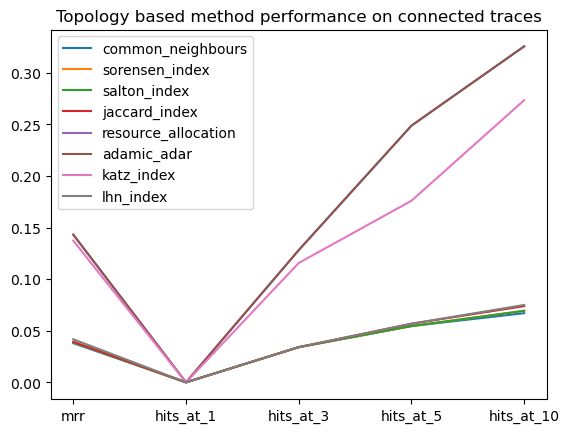

In [9]:
topology_connected_df.plot()
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,5), x_values)
plt.title("Topology based method performance on connected traces")
plt.show()

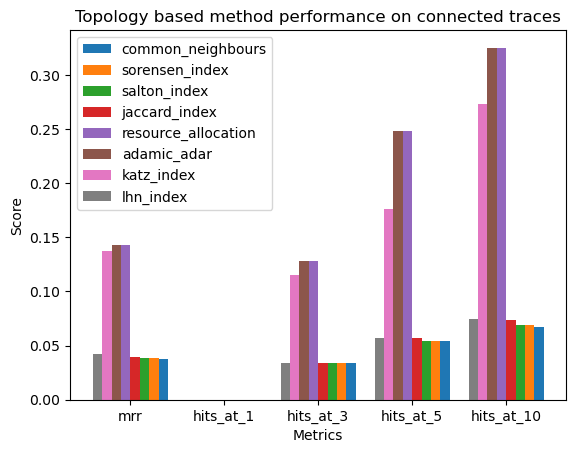

In [10]:
X_axis = np.arange(len(topology_connected_df))+0.35
metrics = list(topology_connected_df)[1:]
for i in range(len(metrics)):
    plt.bar(X_axis - 0.1*i,topology_connected_df[metrics[i]], 0.1, label = metrics[i])
  
x_values = topology_connected_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Topology based method performance on connected traces")
plt.legend()
plt.show()

In [11]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2']

In [12]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'All data/Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [13]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','realistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','optimistic':model_name}))

In [14]:
traces_testing_df_list[0]

,metric,convE_transductive
0,inverse_harmonic_mean_rank,0.568130
1,hits_at_1,0.379935
2,hits_at_3,0.682953
3,hits_at_5,0.796821
4,hits_at_10,0.948251


In [15]:
traces_testing_df = traces_testing_df_list[0]
for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')

In [16]:
traces_testing_df

,metric,convE_transductive,tuckER_transductive,rotatE_transductive,rgcn_transductive,quatE_transductive,nodepiece_transductive_2
0,inverse_harmonic_mean_rank,0.568130,0.618457,0.758552,0.467251,0.765415,0.655864
1,hits_at_1,0.379935,0.419083,0.588092,0.257203,0.646847,0.490973
2,hits_at_3,0.682953,0.774699,0.924481,0.623348,0.873487,0.772039
3,hits_at_5,0.796821,0.894633,0.965060,0.739477,0.939147,0.898451
4,hits_at_10,0.948251,0.980055,0.989355,0.874131,0.970239,0.959573


/tmp/ipykernel_28658/163284778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values[0] = 'mrr'


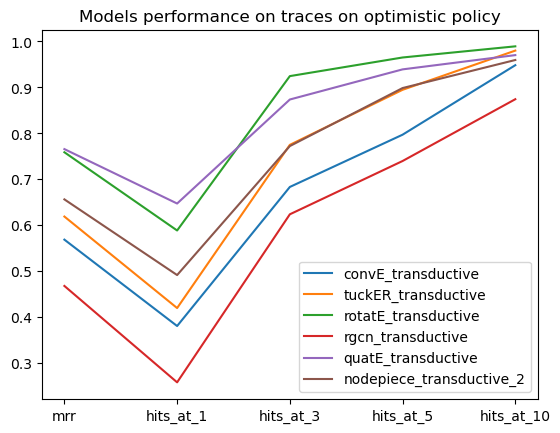

In [17]:
traces_testing_df.plot()
x_values = traces_testing_df['metric']
x_values[0] = 'mrr'
plt.xticks(np.arange(0,5), x_values)
plt.title("Models performance on traces on optimistic policy")
plt.show()

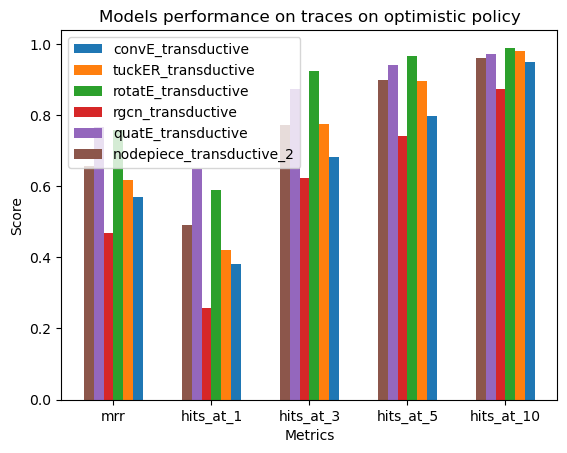

In [18]:
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Models performance on traces on optimistic policy")
plt.legend()
plt.show()

In [19]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [20]:
# traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5
# anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_testing_traces/anyburl_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
# anyburl_list = list(anyburl.mean())
# mrr = anyburl_list.pop()
# anyburl_list.insert(0,mrr)
# traces_testing_df['anyburl_10_transductive'] = anyburl_list
# models = list(traces_testing_df)[1:]
# X_axis = np.arange(len(traces_testing_df)) +0.25
# plt.figure(figsize=(8, 8))
# for i in range(len(models)):
#     plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
# x_values = traces_testing_df['metric']
# plt.xticks(np.arange(0,len(x_values)), x_values)
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.title("Models performance on traces on optimistic policy")
# plt.legend()
# plt.show()

In [21]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [22]:
traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,AnyBURL
0,MRR,0.568130,0.618457,0.758552,0.467251,0.765415,0.655864,0.569465
1,Hits@1,0.379935,0.419083,0.588092,0.257203,0.646847,0.490973,0.470575
2,Hits@3,0.682953,0.774699,0.924481,0.623348,0.873487,0.772039,0.590203
4,Hits@10,0.948251,0.980055,0.989355,0.874131,0.970239,0.959573,0.828518


\begin{table}[ht!]
\centering
\caption{Models' use-case performance on min policy.}
\label{tab:use_case_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric    &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE     &   0.56813 &  0.379935 &  0.682953 &  0.948251 \\
TuckER    &  0.618457 &  0.419083 &  0.774699 &  0.980055 \\
RotatE    &  0.758552 &  0.588092 &  0.924481 &  0.989355 \\
R-GCN     &  0.467251 &  0.257203 &  0.623348 &  0.874131 \\
QuatE     &  0.765415 &  0.646847 &  0.873487 &  0.970239 \\
NodePiece &  0.655864 &  0.490973 &  0.772039 &  0.959573 \\
AnyBURL   &  0.569465 &  0.470575 &  0.590203 &  0.828518 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/3077627922.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(traces_testing_df.T.to_latex( #hrules=True,


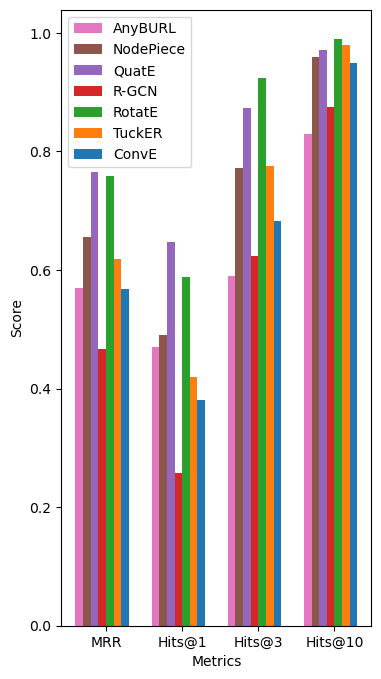

In [23]:
anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_pretrained_testing_traces/anyburl_pretrained_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
anyburl_list = list(anyburl.mean())
mrr = anyburl_list.pop()
anyburl_list.insert(0,mrr)
traces_testing_df['anyburl_100_pretrained_transductive'] = anyburl_list
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
print(traces_testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:use_case_min',
                                   caption = f'Models\' use-case performance on min policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case performance on min policy")
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece
0,MRR,0.568130,0.618457,0.758552,0.467251,0.765415,0.455867
1,Hits@1,0.379935,0.419083,0.588092,0.257203,0.646847,0.230819
2,Hits@3,0.682953,0.774699,0.924481,0.623348,0.873487,0.575384
3,Hits@5,0.796821,0.894633,0.965060,0.739477,0.939147,0.743811
4,Hits@10,0.948251,0.980055,0.989355,0.874131,0.970239,0.926090


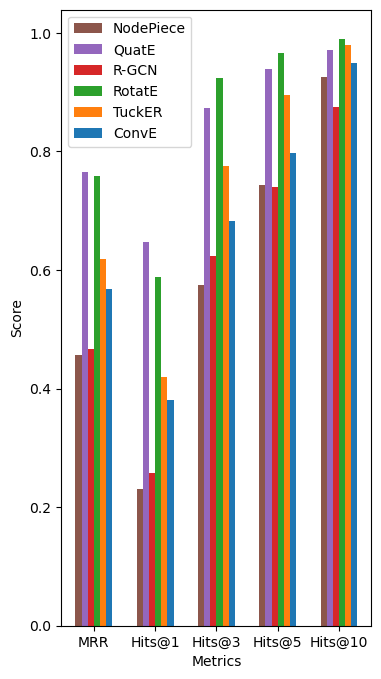

In [24]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','optimistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','realistic':model_name}))
    

traces_testing_df = traces_testing_df_list[0]

for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')
    
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
# print(traces_testing_df.T.to_latex( #hrules=True,
#                                    label = f'tab:use_case_avg',
#                                    caption = f'Models\' use-case performance on avg policy.',
#                                    #clines = "all;data",
#                                    position="ht!",
#                                    #position_float="centering",
#                                    column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
# #                                    index = True,
#                                    header =False,
# #                                    bold_rows=True
#     )
#                                    )
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case performance on avg policy")
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece
0,MRR,0.568130,0.618457,0.758552,0.467251,0.765415,0.431016
1,Hits@1,0.379935,0.419083,0.588092,0.257203,0.646847,0.230819
2,Hits@3,0.682953,0.774699,0.924481,0.623348,0.873487,0.545928
3,Hits@5,0.796821,0.894633,0.965060,0.739477,0.939147,0.696257
4,Hits@10,0.948251,0.980055,0.989355,0.874131,0.970239,0.817485


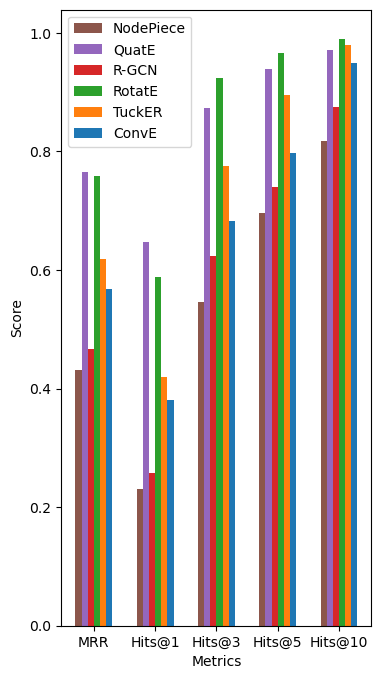

In [25]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['realistic','optimistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','pessimistic':model_name}))
    

traces_testing_df = traces_testing_df_list[0]

for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')
    
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
# print(traces_testing_df.T.to_latex( #hrules=True,
#                                    label = f'tab:use_case_avg',
#                                    caption = f'Models\' use-case performance on avg policy.',
#                                    #clines = "all;data",
#                                    position="ht!",
#                                    #position_float="centering",
#                                    column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
# #                                    index = True,
#                                    header =False,
# #                                    bold_rows=True
#     )
#                                    )
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case performance on max policy")
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

In [26]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2','nodepiece_inductive_2']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [27]:
# def plot_test(pred_type,policy):
#     policies = ['optimistic', 'realistic','pessimistic']
#     policies.remove(policy)
#     testing_df_list = []
#     for model_name in model_name_list:
#         testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
#                                      .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
#     testing_df = testing_df_list[0]
#     for i in range(1, len(testing_df_list)):
#         testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
# #     testing_df.plot()
# #     x_values = testing_df['metric']
# #     x_values[0] = 'mrr'
# #     plt.xticks(np.arange(0,5), x_values)
# #     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
# #     plt.show()
    
    
#     models = list(testing_df)[1:]
#     X_axis = np.arange(len(testing_df)) +0.25
#     for i in range(len(models)):
#         plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

#     x_values = testing_df['metric']
#     x_values[0] = 'mrr'

#     plt.xticks(np.arange(0,len(x_values)), x_values)
#     plt.xlabel("Metrics")
#     plt.ylabel("Score")
#     plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
#     plt.legend()

#     plt.show()

In [28]:
# for pred_type in ['head','tail','both']:
#     for policy in ['optimistic', 'realistic','pessimistic']:
#         plot_test(pred_type,policy)

In [29]:
def plot_information(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.bar(names,list(information_df[information]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Models {information}')
    plt.show()
    

In [30]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_entire_graph.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_entire_graph'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

,parameters bytes
convE_transductive,2.170017e+07
tuckER_transductive,4.533360e+07
rotatE_transductive,2.666080e+07
rgcn_transductive,1.557229e+07
quatE_transductive,5.332160e+07
nodepiece_transductive_2,9.728000e+05
nodepiece_inductive_2,6.732800e+06
anyburl,1.000000e+09


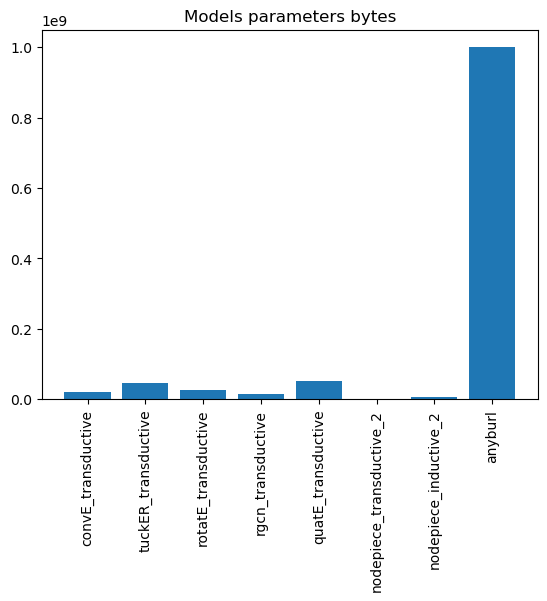

,number parameters
convE_transductive,5425043.0
tuckER_transductive,11333400.0
rotatE_transductive,6665200.0
rgcn_transductive,3893072.0
quatE_transductive,13330400.0
nodepiece_transductive_2,243200.0
nodepiece_inductive_2,1683200.0
anyburl,377728.0


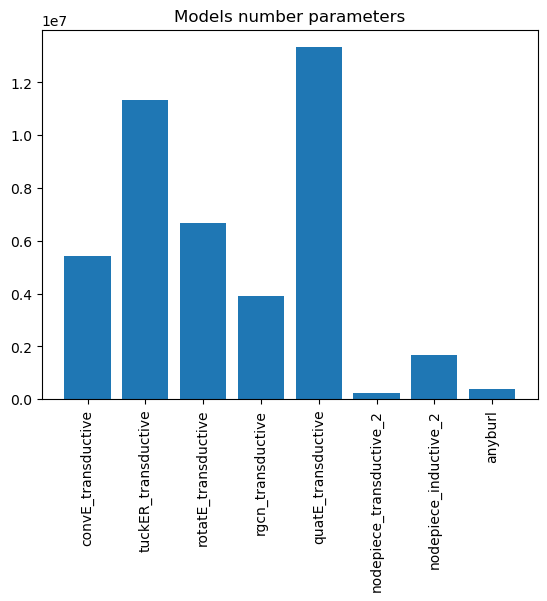

,training duration
convE_transductive,152.307357
tuckER_transductive,2184.641061
rotatE_transductive,1083.521330
rgcn_transductive,162.562170
quatE_transductive,5897.180882
nodepiece_transductive_2,249.551234
nodepiece_inductive_2,72.856738
anyburl,100.000000


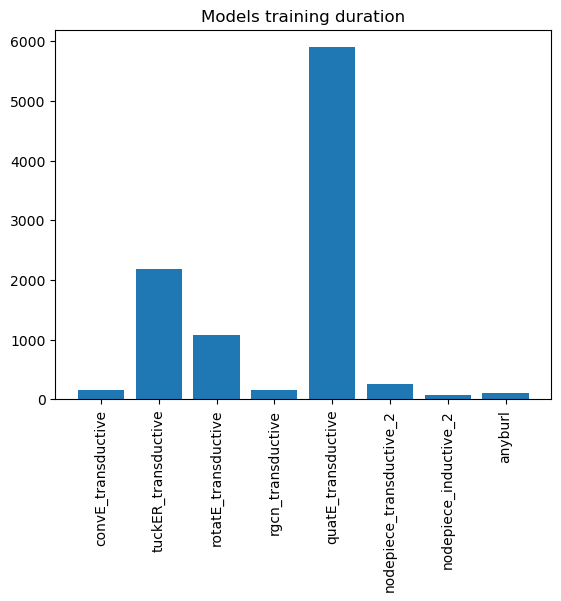

,testing evaluation duration
convE_transductive,3.743608
tuckER_transductive,15.446498
rotatE_transductive,9.931920
rgcn_transductive,6.276913
quatE_transductive,73.281976
nodepiece_transductive_2,6.582701
nodepiece_inductive_2,1.217404
anyburl,53.595100


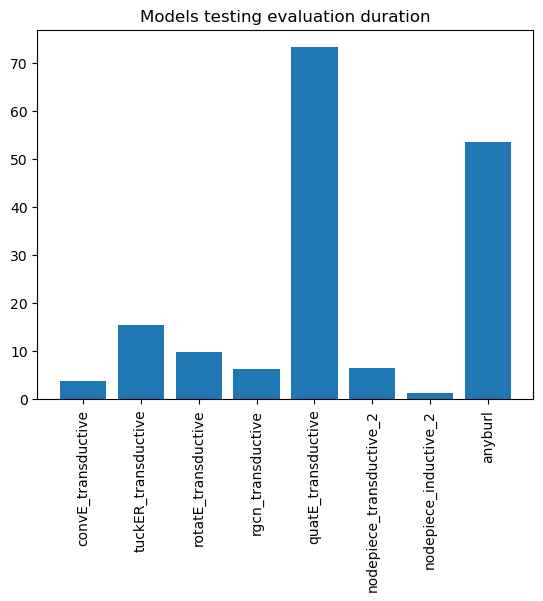

In [31]:
for information in['parameters bytes','number parameters', 'training duration','testing evaluation duration']:
    plot_information(information)

In [32]:
# policy = "pessimistic"
# pred_type = "tail"
# policies = ['optimistic', 'realistic','pessimistic']
# policies.remove(policy)
# testing_df_list = []
# for model_name in model_name_list:
#     testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
#                                      .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
# # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
# testing_df = testing_df_list[0]
# for i in range(1, len(testing_df_list)):
#     testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')

# testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
# anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
# anyburl_list = list(anyburl.iloc[0])
# mrr = anyburl_list.pop()
# anyburl_list.insert(0,mrr)
# # model_name_list.append('anyburl')
# testing_df['anyburl_100_transductive'] = anyburl_list
# display(testing_df)
# models = list(testing_df)[1:]
# X_axis = np.arange(len(testing_df)) +0.25
# plt.figure(figsize=(8, 8))

# for i in range(len(models)):
#     plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

# x_values = testing_df['metric']
# x_values[0] = 'mrr'
# plt.xticks(np.arange(0,len(x_values)), x_values)
# plt.xlabel("Metrics")
# plt.ylabel("Score")
# plt.title(f'Models performance on {pred_type} prediction on {policy} policy')
# plt.legend()
# plt.show()

In [33]:
def plot_test_2(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                         .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
    # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
    testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
        
    column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    if pred_type == "both" and policy == "optimistic":
        testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
        anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1)
        anyburl_list = list(anyburl.iloc[0])
        mrr = anyburl_list.pop()
        anyburl_list.insert(0,mrr)
        # model_name_list.append('anyburl')
        testing_df['anyburl_100_transductive'] = anyburl_list
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
#         column_format="p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.04\\textwidth}"
        column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    else:
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
        
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric"}
    testing_df.rename(columns=column_dict,inplace=True)
    display(testing_df)
    
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    plt.figure(figsize=(4, 8))

    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['Metric']
#     x_values[0] = 'mrr'
    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    policydict = {'optimistic':"min", 'realistic':"average",'pessimistic':"max"}
#     plt.title(f'Models\' {pred_type} prediction performance on {policydict[policy]} policy')
    # get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # reverse the order of handles and labels
    handles = handles[::-1]
    labels = labels[::-1]
    plt.legend(handles,labels,bbox_to_anchor=(0.9, 1.3))
    plt.show()
    testing_df =testing_df.reset_index(drop=True)
    print(testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:classic_{pred_type}_{policydict[policy]}',
                                   caption = f'Models\' {pred_type} prediction performance on {policydict[policy]} policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format=column_format,
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.655206,0.689833
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.652116,0.681156
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.655151,0.690452
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.655597,0.692211
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.657650,0.698241


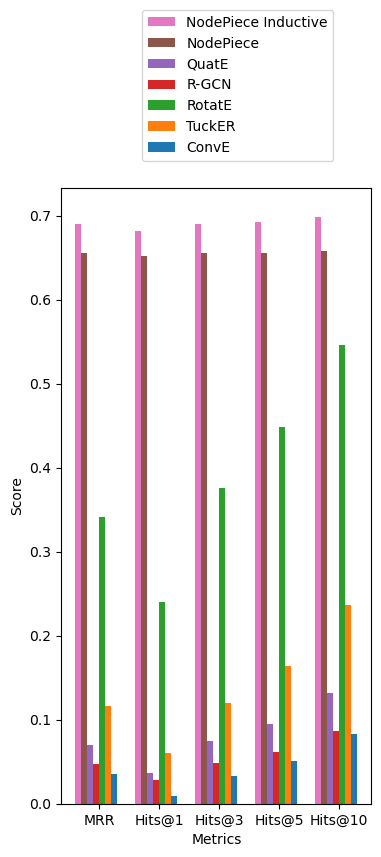

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on min policy.}
\label{tab:classic_head_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.655206 &  0.652116 &  0.655151 &  0.655597 &   0.65765 \\
NodePiece Inductive &  0.689833 &  0.681156 &  0.690452 &  0.692211 &  0.698241 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.003257,0.013618
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001875,0.011809
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.001964,0.015327
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.004374,0.024372


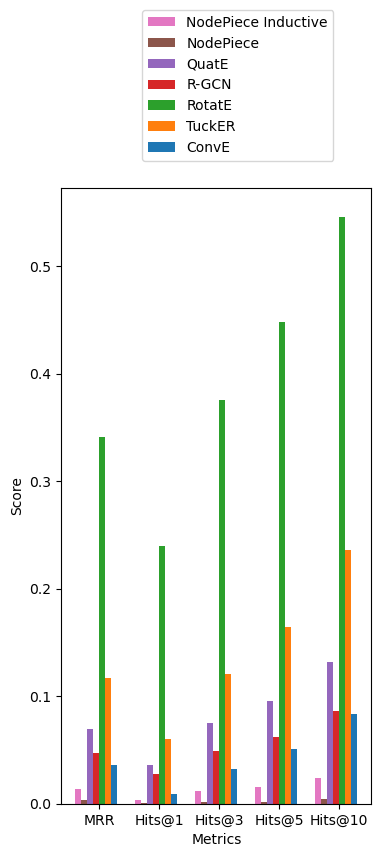

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on average policy.}
\label{tab:classic_head_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.003257 &  0.000357 &  0.001875 &  0.001964 &  0.004374 \\
NodePiece Inductive &  0.013618 &  0.003015 &  0.011809 &  0.015327 &  0.024372 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.035839,0.116845,0.341663,0.047420,0.069786,0.002442,0.012160
1,Hits@1,0.009284,0.059900,0.239600,0.027674,0.035976,0.000357,0.003015
2,Hits@3,0.032673,0.120336,0.375558,0.048831,0.074719,0.001339,0.011809
3,Hits@5,0.050616,0.164078,0.448581,0.061775,0.095251,0.001875,0.013317
4,Hits@10,0.083467,0.236297,0.545885,0.086145,0.131851,0.002500,0.021608


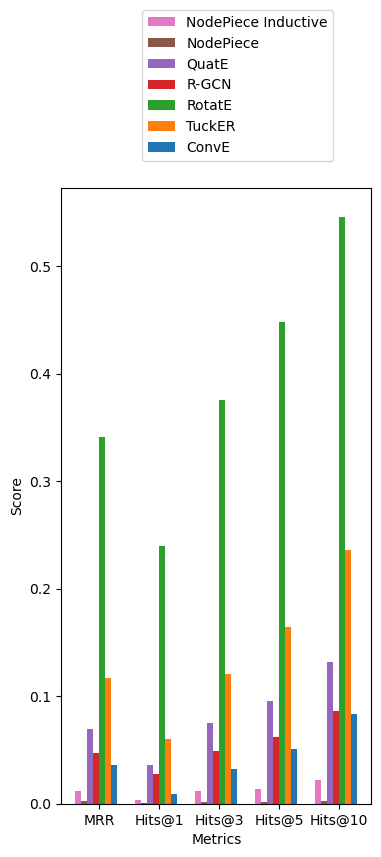

\begin{table}[ht!]
\centering
\caption{Models' head prediction performance on max policy.}
\label{tab:classic_head_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.035839 &  0.009284 &  0.032673 &  0.050616 &  0.083467 \\
TuckER              &  0.116845 &    0.0599 &  0.120336 &  0.164078 &  0.236297 \\
RotatE              &  0.341663 &    0.2396 &  0.375558 &  0.448581 &  0.545885 \\
R-GCN               &   0.04742 &  0.027674 &  0.048831 &  0.061775 &  0.086145 \\
QuatE               &  0.069786 &  0.035976 &  0.074719 &  0.095251 &  0.131851 \\
NodePiece           &  0.002442 &  0.000357 &  0.001339 &  0.001875 &    0.0025 \\
NodePiece Inductive &   0.01216 &  0.003015 &  0.011809 &  0.013317 &  0.021608 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.061445,0.064085
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.049813,0.040955
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.062757,0.063317
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.063292,0.068844
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.079986,0.090201


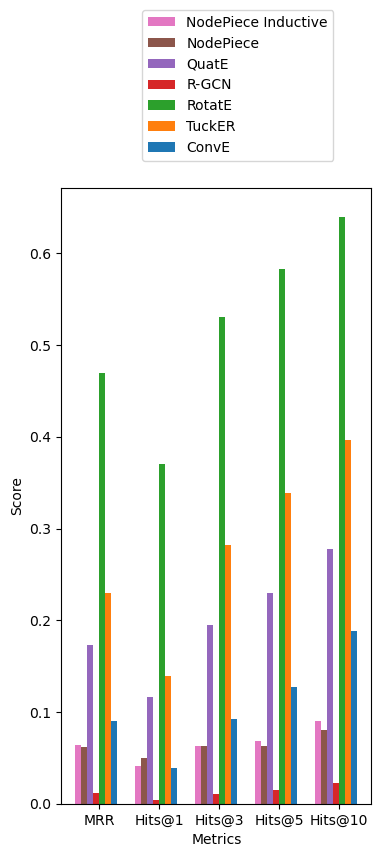

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on min policy.}
\label{tab:classic_tail_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.061445 &  0.049813 &  0.062757 &  0.063292 &  0.079986 \\
NodePiece Inductive &  0.064085 &  0.040955 &  0.063317 &  0.068844 &  0.090201 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.007882,0.046283
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000982,0.037186
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.013033,0.057286
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.014105,0.074372


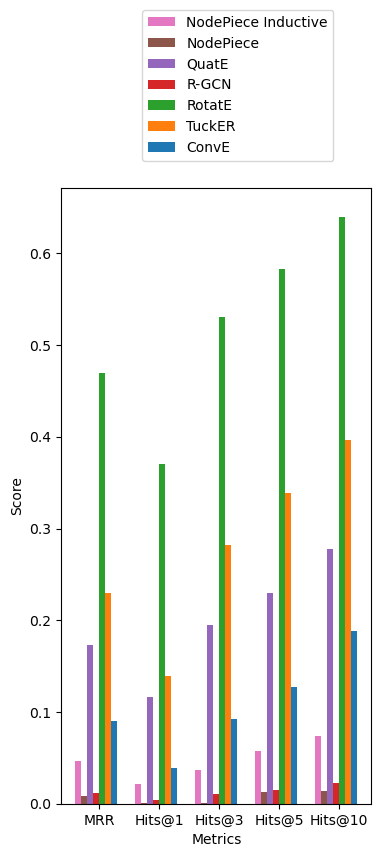

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on average policy.}
\label{tab:classic_tail_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.007882 &  0.000357 &  0.000982 &  0.013033 &  0.014105 \\
NodePiece Inductive &  0.046283 &  0.021357 &  0.037186 &  0.057286 &  0.074372 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.090014,0.229754,0.469115,0.011751,0.173272,0.005513,0.043638
1,Hits@1,0.038654,0.138904,0.370112,0.004374,0.116319,0.000357,0.021357
2,Hits@3,0.092751,0.281646,0.531066,0.011069,0.194697,0.000625,0.036683
3,Hits@5,0.127567,0.339136,0.583467,0.015087,0.229691,0.001161,0.042211
4,Hits@10,0.188091,0.396269,0.639618,0.022764,0.277272,0.013480,0.068593


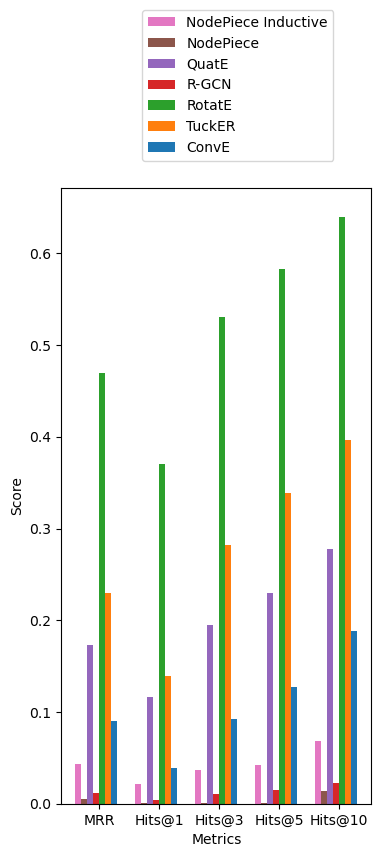

\begin{table}[ht!]
\centering
\caption{Models' tail prediction performance on max policy.}
\label{tab:classic_tail_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.090014 &  0.038654 &  0.092751 &  0.127567 &  0.188091 \\
TuckER              &  0.229754 &  0.138904 &  0.281646 &  0.339136 &  0.396269 \\
RotatE              &  0.469115 &  0.370112 &  0.531066 &  0.583467 &  0.639618 \\
R-GCN               &  0.011751 &  0.004374 &  0.011069 &  0.015087 &  0.022764 \\
QuatE               &  0.173272 &  0.116319 &  0.194697 &  0.229691 &  0.277272 \\
NodePiece           &  0.005513 &  0.000357 &  0.000625 &  0.001161 &   0.01348 \\
NodePiece Inductive &  0.043638 &  0.021357 &  0.036683 &  0.042211 &  0.068593 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.358326,0.376959,0.4355
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.350964,0.361055,0.3523
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.358954,0.376884,0.4705
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.368818,0.394221,0.6037


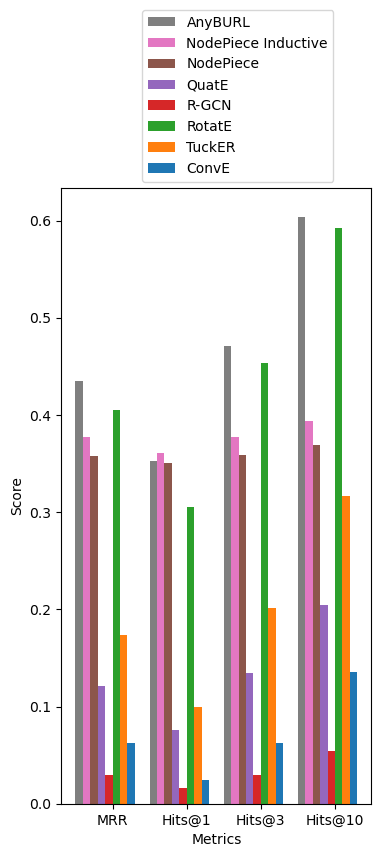

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on min policy.}
\label{tab:classic_both_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.204562 \\
NodePiece           &  0.358326 &  0.350964 &  0.358954 &  0.368818 \\
NodePiece Inductive &  0.376959 &  0.361055 &  0.376884 &  0.394221 \\
AnyBURL             &    0.4355 &    0.3523 &    0.4705 &    0.6037 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.005569,0.029950
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.001428,0.024497
3,Hits@5,0.089091,0.251607,0.516024,0.038431,0.162471,0.007499,0.036307
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.009239,0.049372


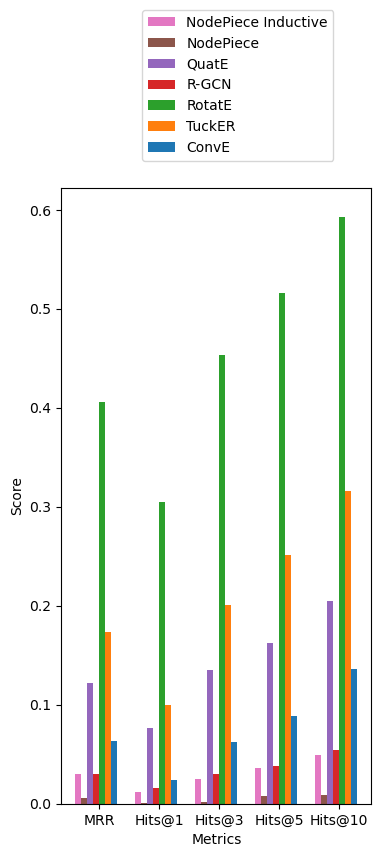

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on average policy.}
\label{tab:classic_both_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.089091 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.251607 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.516024 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.038431 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.162471 &  0.204562 \\
NodePiece           &  0.005569 &  0.000357 &  0.001428 &  0.007499 &  0.009239 \\
NodePiece Inductive &   0.02995 &  0.012186 &  0.024497 &  0.036307 &  0.049372 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.062926,0.173300,0.405389,0.029585,0.121529,0.003977,0.027899
1,Hits@1,0.023969,0.099402,0.304856,0.016024,0.076147,0.000357,0.012186
2,Hits@3,0.062712,0.200991,0.453312,0.029950,0.134708,0.000982,0.024246
3,Hits@5,0.089091,0.251607,0.516024,0.038431,0.162471,0.001518,0.027764
4,Hits@10,0.135779,0.316283,0.592751,0.054455,0.204562,0.007990,0.045101


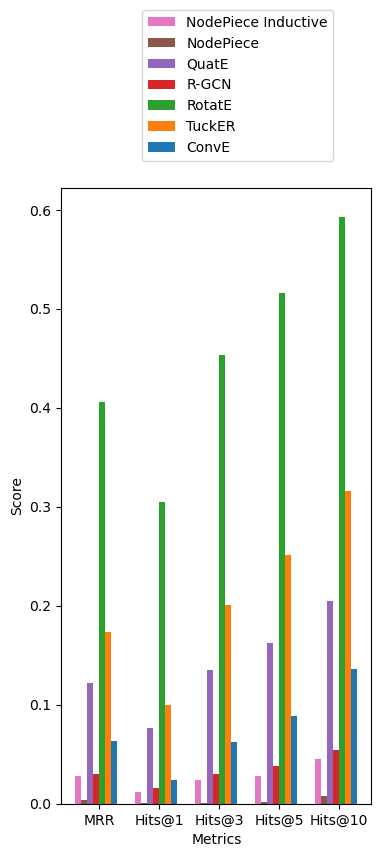

\begin{table}[ht!]
\centering
\caption{Models' both prediction performance on max policy.}
\label{tab:classic_both_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.062926 &  0.023969 &  0.062712 &  0.089091 &  0.135779 \\
TuckER              &    0.1733 &  0.099402 &  0.200991 &  0.251607 &  0.316283 \\
RotatE              &  0.405389 &  0.304856 &  0.453312 &  0.516024 &  0.592751 \\
R-GCN               &  0.029585 &  0.016024 &   0.02995 &  0.038431 &  0.054455 \\
QuatE               &  0.121529 &  0.076147 &  0.134708 &  0.162471 &  0.204562 \\
NodePiece           &  0.003977 &  0.000357 &  0.000982 &  0.001518 &   0.00799 \\
NodePiece Inductive &  0.027899 &  0.012186 &  0.024246 &  0.027764 &  0.045101 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/841892721.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


In [34]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test_2(pred_type,policy)

In [35]:
def plot_inference_time(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
    information_df['Median RT'] = 1e-3
    information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={"testing evaluation duration":"Testing time per trace (s)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    barlist = plt.bar(names,np.array(information_df["Testing time per trace (s)"]))
    barlist[-1].set_color('r')
#     barlist[-2].set_color('orange')
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
#     plt.hlines(1e-3,xmin=-0.5,xmax=len(information_df)-0.5,colors="r")
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Inference time per trace (s)')
    plt.ylabel('Seconds')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,3.743607759475708,15.446498394012451,9.931920051574707,6.276913404464722,73.2819755077362,6.582700729370117,1.2174043655395508,53.59509992599487


,Testing time per trace (s)
ConvE,0.000334
TuckER,0.001379
RotatE,0.000887
R-GCN,0.000560
QuatE,0.006542
NodePiece,0.000588
NodePiece Inductive,0.000312
AnyBURL,0.004784
Median RT,0.001000


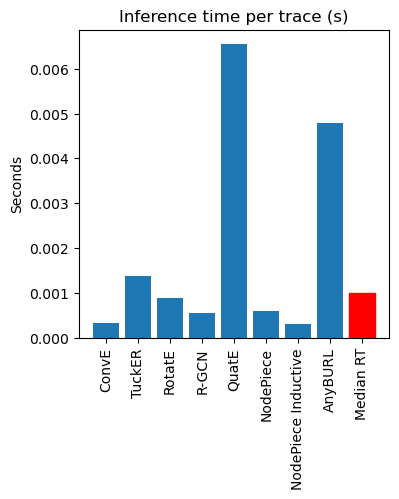

In [36]:
inference_df = plot_inference_time('testing evaluation duration')

In [37]:
def plot_param_bytes(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
#     information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
#     information_df['Median RT'] = 1e-3
#     information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Memory usage (B)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Memory usage (B)"])/1e6)
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Memory usage (MB)')
    plt.ylabel('Megabytes')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,21700172,45333600,26660800,15572288,53321600,972800,6732800,1000000000.0


,Memory usage (B)
ConvE,2.170017e+07
TuckER,4.533360e+07
RotatE,2.666080e+07
R-GCN,1.557229e+07
QuatE,5.332160e+07
NodePiece,9.728000e+05
NodePiece Inductive,6.732800e+06
AnyBURL,1.000000e+09


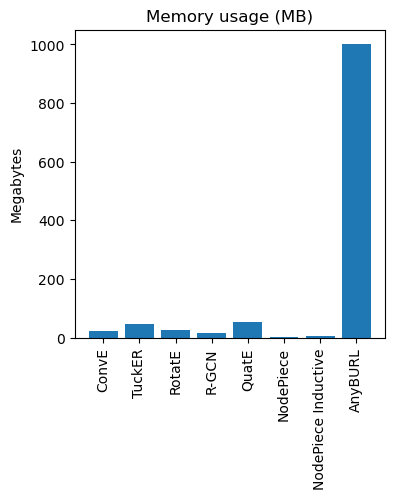

In [38]:
mem_df = plot_param_bytes('parameters bytes')

In [39]:
def plot_training_duration(information):
#     columns = [
# #         'device', 'parameters bytes','number parameters', 'training duration','training evaluation duration',
# #               'validation evaluation duration','testing evaluation duration','Operating system name',
# #               'Operating system version','Processor architecture','Python version','Processor model name',
# #               'Number cpu cores','Total physical memory','GPU','loss','embedding_dim','learning_rate','optimizer',
#                 'num_epochs','patience'
#               ]
#     columns.remove(information)
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
#     information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
#     information_df['Median RT'] = 1e-3
#     information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Training duration (s)"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Training duration (s)"]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Training time (s)')
    plt.ylabel('Seconds')
    plt.show()
    
    return information_df

,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,152.30735683441162,2184.6410613059998,1083.5213296413422,162.5621702671051,5897.1808824539185,249.5512342453003,72.85673785209656,100


,Training duration (s)
ConvE,152.307358
TuckER,2184.641113
RotatE,1083.521362
R-GCN,162.562164
QuatE,5897.180664
NodePiece,249.551239
NodePiece Inductive,72.856735
AnyBURL,100.000000


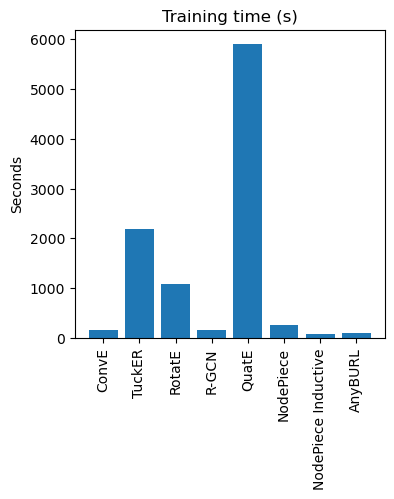

In [40]:
training_df = plot_training_duration('training duration')

In [41]:
pd.concat([inference_df,mem_df,training_df],axis=1)

,Testing time per trace (s),Memory usage (B),Training duration (s)
ConvE,0.000334,2.170017e+07,152.307358
TuckER,0.001379,4.533360e+07,2184.641113
RotatE,0.000887,2.666080e+07,1083.521362
R-GCN,0.000560,1.557229e+07,162.562164
QuatE,0.006542,5.332160e+07,5897.180664
NodePiece,0.000588,9.728000e+05,249.551239
NodePiece Inductive,0.000312,6.732800e+06,72.856735
AnyBURL,0.004784,1.000000e+09,100.000000
Median RT,0.001000,NaN,NaN


In [42]:
print(pd.concat([inference_df,mem_df,training_df],axis=1).to_latex( #hrules=True,
                                   label = f'tab:additional_requirements',
                                   caption = f'Models additional requirements performance.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.23\\textwidth} p{0.23\\textwidth} p{0.23\\textwidth} p{0.23\\textwidth}",
#                                    index = True,
                                   header =True,
                                   na_rep="-"
#                                    bold_rows=True
    )
     )                             

\begin{table}[ht!]
\centering
\caption{Models additional requirements performance.}
\label{tab:additional_requirements}
\begin{tabular}{p{0.23\textwidth} p{0.23\textwidth} p{0.23\textwidth} p{0.23\textwidth}}
\toprule
{} &  Testing time per trace (s) &  Memory usage (B) &  Training duration (s) \\
\midrule
ConvE               &                    0.000334 &      2.170017e+07 &             152.307358 \\
TuckER              &                    0.001379 &      4.533360e+07 &            2184.641113 \\
RotatE              &                    0.000887 &      2.666080e+07 &            1083.521362 \\
R-GCN               &                    0.000560 &      1.557229e+07 &             162.562164 \\
QuatE               &                    0.006542 &      5.332160e+07 &            5897.180664 \\
NodePiece           &                    0.000588 &      9.728000e+05 &             249.551239 \\
NodePiece Inductive &                    0.000312 &      6.732800e+06 &              72.856735 \\
AnyBUR

/tmp/ipykernel_28658/1120204021.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([inference_df,mem_df,training_df],axis=1).to_latex( #hrules=True,


In [43]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2','nodepiece_inductive_2']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [44]:
model_name_list_0 = ['convE_0_transductive','tuckER_0_transductive','rotatE_0_transductive','rgcn_0_transductive',
                     'quatE_0_transductive','nodepiece_0_transductive_2','nodepiece_0_inductive_2']
for model_name in model_name_list_0:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'Subset 0/{model_name}.zip'
    extract_dir =f'Subset 0/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [45]:
def plot_information_train_0(information):

    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    information_df_1 = information_df_list[0]
    for i in range(1, len(information_df_list)):
        information_df_1 = pd.merge(information_df_1,information_df_list[i],on='name')
    information_df_1['anyburl'] = 100
    information_df_list = []
    for model_name in model_name_list_0:
        temp_df = pd.read_csv(f'Subset 0/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    information_df_2 = information_df_list[0]
    for i in range(1, len(information_df_list)):
        information_df_2 = pd.merge(information_df_2,information_df_list[i],on='name')
    information_df_2['anyburl'] = 100
    information_df_2['name'] = "training duration subset 0"
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL",
                   'convE_0_transductive': "ConvE", "tuckER_0_transductive":"TuckER", "rotatE_0_transductive":"RotatE",
                  "rgcn_0_transductive":"R-GCN","quatE_0_transductive":"QuatE","nodepiece_0_transductive_2":"NodePiece",
                  "nodepiece_0_inductive_2":"NodePiece Inductive"}
    information_df_1.rename(columns=column_dict,inplace=True)
    information_df_2.rename(columns=column_dict,inplace=True)
    #display(information_df_1.T)
    #display(information_df_2.T)
    information_df = pd.concat([information_df_1.T,information_df_2.T],axis=1)
    information_df.columns = information_df.iloc[0]
    information_df = information_df[1:]
    names = list(information_df_1)[1:]
    
    information_df.rename(columns={'training duration':"Training time entire dataset", "training duration subset 0"
                                   : "Training time subset dataset","name":"Models"},inplace=True)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype(float)
    display(information_df)
    
    print(information_df.to_latex( #hrules=True,
                                   label = f'tab:additional_requirements_training',
                                   caption = f'Models additional requirements training time.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.3\\textwidth} p{0.3\\textwidth} p{0.34\\textwidth}",
#                                    index = True,
                                   header =True,
                                   na_rep="-"
#                                    bold_rows=True
    )
     )                             

    X_axis = np.arange(len(names))
    plt.bar(X_axis+0.1,information_df['Training time entire dataset'], 0.2, label = "Entire Dataset")
    plt.bar(X_axis-0.1,information_df['Training time subset dataset'], 0.2, label = "Subset Dataset")
    x_values = names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.xlabel("Models")
    plt.ylabel("Seconds")
    plt.title("Models training time (s)")
    plt.legend()
    plt.show()

name,Training time entire dataset,Training time subset dataset
ConvE,152.307357,102.707103
TuckER,2184.641061,447.257632
RotatE,1083.521330,243.895983
R-GCN,162.562170,25.375953
QuatE,5897.180882,451.730982
NodePiece,249.551234,86.305915
NodePiece Inductive,72.856738,14.611734
AnyBURL,100.000000,100.000000


\begin{table}[ht!]
\centering
\caption{Models additional requirements training time.}
\label{tab:additional_requirements_training}
\begin{tabular}{p{0.3\textwidth} p{0.3\textwidth} p{0.34\textwidth}}
\toprule
name &  Training time entire dataset &  Training time subset dataset \\
\midrule
ConvE               &                    152.307357 &                    102.707103 \\
TuckER              &                   2184.641061 &                    447.257632 \\
RotatE              &                   1083.521330 &                    243.895983 \\
R-GCN               &                    162.562170 &                     25.375953 \\
QuatE               &                   5897.180882 &                    451.730982 \\
NodePiece           &                    249.551234 &                     86.305915 \\
NodePiece Inductive &                     72.856738 &                     14.611734 \\
AnyBURL             &                    100.000000 &                    100.000000 \\
\bottomrule
\e

/tmp/ipykernel_28658/3145598161.py:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(information_df.to_latex( #hrules=True,


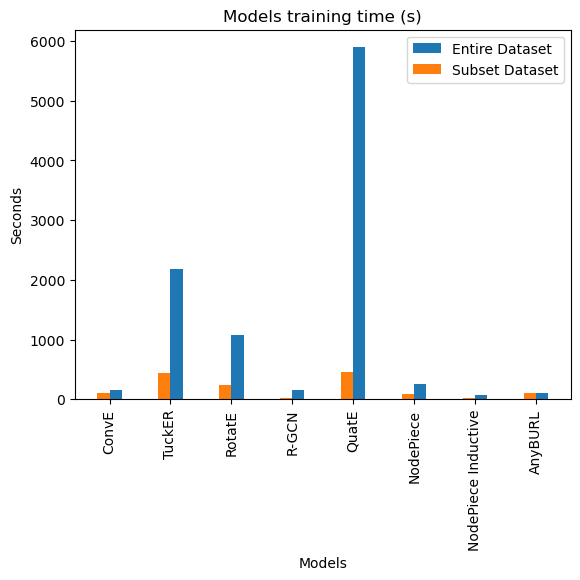

In [46]:
plot_information_train_0('training duration')

In [47]:
def plot_num_parameters():

    information = "number parameters"
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    information_df['AnyBURL'] = 388656 # the reported table was wrong
    display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
#     information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
#     information_df['Median RT'] = 1e-3
#     information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Number of parameters"},inplace=True)

#     information_df[information]=information_df[information].astype(float)
#     for elem in names:
#         information_df[elem] = information_df[elem].astype(float)
#     information_df=np.log(information_df)
    display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Number of parameters"]))
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Number of parameters')
    plt.ylabel('Number of parameters')
    plt.show()
    


,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,5425043,11333400,6665200,3893072,13330400,243200,1683200,388656


,Number of parameters
ConvE,5425043.0
TuckER,11333400.0
RotatE,6665200.0
R-GCN,3893072.0
QuatE,13330400.0
NodePiece,243200.0
NodePiece Inductive,1683200.0
AnyBURL,388656.0


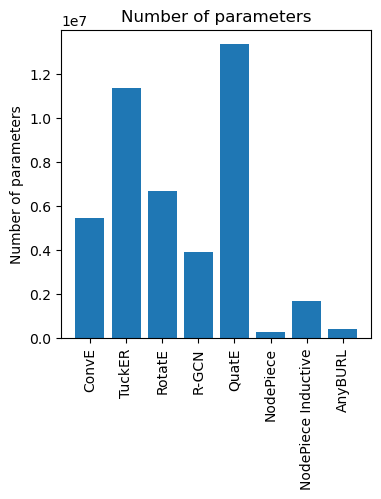

In [48]:
plot_num_parameters()

In [49]:
model_name_list = ['convE_transductive_io','tuckER_transductive_io','rotatE_transductive_io','rgcn_transductive_io','quatE_transductive_io',
                   'nodepiece_transductive_2_io']

In [50]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'All data/Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [51]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','realistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','optimistic':model_name}))

In [52]:
traces_testing_df = traces_testing_df_list[0]
for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')

In [53]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_pretrained_io_testing_traces.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_pretrained_io_testing_traces'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [54]:
traces_testing_df = traces_testing_df.drop(index=3,axis=0) #dropping hits at 5

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,AnyBURL
0,MRR,0.655687,0.499857,0.719895,0.531569,0.738000,0.579144,0.536483
1,Hits@1,0.455555,0.300968,0.548439,0.311913,0.538355,0.382178,0.425513
2,Hits@3,0.826662,0.636910,0.861234,0.705772,0.940276,0.728246,0.584944
4,Hits@10,0.980794,0.881751,0.995838,0.936340,0.996922,0.964604,0.784499


\begin{table}[ht!]
\centering
\caption{Models' use-case IO performance on min policy.}
\label{tab:use_case_min_io}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric    &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE     &  0.655687 &  0.455555 &  0.826662 &  0.980794 \\
TuckER    &  0.499857 &  0.300968 &   0.63691 &  0.881751 \\
RotatE    &  0.719895 &  0.548439 &  0.861234 &  0.995838 \\
R-GCN     &  0.531569 &  0.311913 &  0.705772 &   0.93634 \\
QuatE     &     0.738 &  0.538355 &  0.940276 &  0.996922 \\
NodePiece &  0.579144 &  0.382178 &  0.728246 &  0.964604 \\
AnyBURL   &  0.536483 &  0.425513 &  0.584944 &  0.784499 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/2269228375.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(traces_testing_df.T.to_latex( #hrules=True,


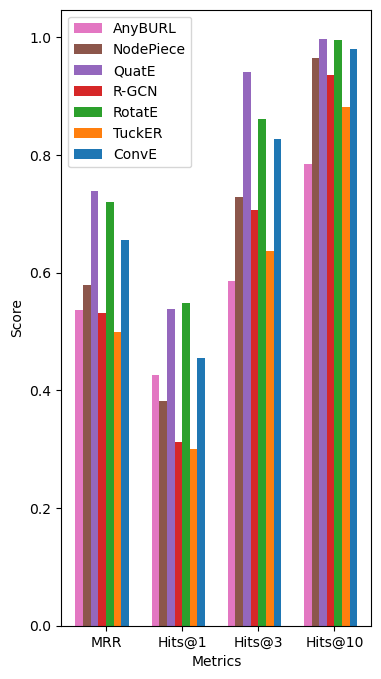

In [55]:
anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_pretrained_io_testing_traces/anyburl_pretrained_io_testing_traces/trace_test.csv').drop(columns='Unnamed: 0',axis=1)
anyburl_list = list(anyburl.mean())
mrr = anyburl_list.pop()
anyburl_list.insert(0,mrr)
traces_testing_df['anyburl_100_pretrained_transductive'] = anyburl_list
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
column_dict = {'convE_transductive_io': "ConvE", "tuckER_transductive_io":"TuckER", "rotatE_transductive_io":"RotatE",
                  "rgcn_transductive_io":"R-GCN","quatE_transductive_io":"QuatE","nodepiece_transductive_2_io":"NodePiece",
                  "nodepiece_inductive_2_io":"NodePiece Inductive","anyburl_io_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL","anyburl_io":"AnyBURL"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
print(traces_testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:use_case_min_io',
                                   caption = f'Models\' use-case IO performance on min policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}",
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case performance on min policy")
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece
0,MRR,0.655687,0.499857,0.719895,0.531569,0.738000,0.547909
1,Hits@1,0.455555,0.300968,0.548439,0.311913,0.538355,0.332289
2,Hits@3,0.826662,0.636910,0.861234,0.705772,0.940276,0.697578
3,Hits@5,0.924447,0.753701,0.965848,0.834001,0.983455,0.858813
4,Hits@10,0.980794,0.881751,0.995838,0.936340,0.996922,0.959691


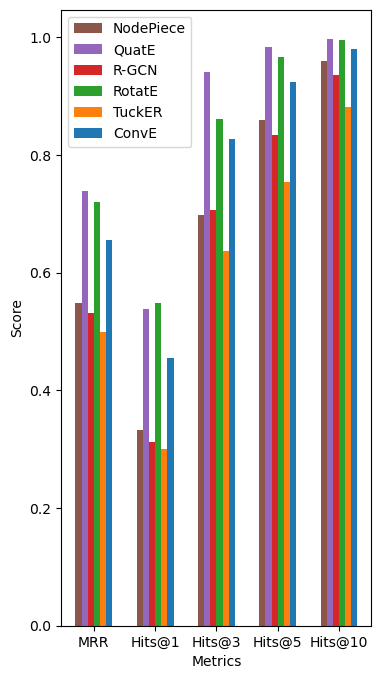

In [56]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','optimistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','realistic':model_name}))
    

traces_testing_df = traces_testing_df_list[0]

for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')
    
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)                          
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case IO performance on avg policy")
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece
0,MRR,0.655687,0.499857,0.719895,0.531569,0.738000,0.539885
1,Hits@1,0.455555,0.300968,0.548439,0.311913,0.538355,0.332289
2,Hits@3,0.826662,0.636910,0.861234,0.705772,0.940276,0.693853
3,Hits@5,0.924447,0.753701,0.965848,0.834001,0.983455,0.850023
4,Hits@10,0.980794,0.881751,0.995838,0.936340,0.996922,0.950962


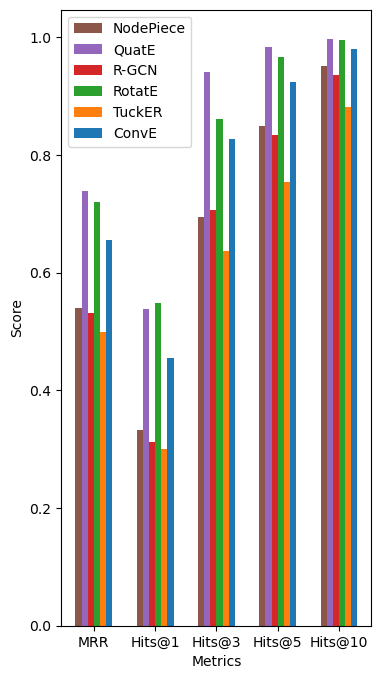

In [57]:
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'All data/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['realistic','optimistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','pessimistic':model_name}))
    

traces_testing_df = traces_testing_df_list[0]

for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')
    
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)
models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("Models' use-case IO performance on max policy")
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()

In [58]:
model_name_list = ['convE_transductive_io','tuckER_transductive_io','rotatE_transductive_io','rgcn_transductive_io','quatE_transductive_io',
                   'nodepiece_transductive_2_io','nodepiece_inductive_2_io']

In [59]:
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [60]:
# specify the path to the zip file and the destination directory for the unzipped files
zip_file_path = f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph.zip'
extract_dir =f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph'

# create a ZipFile object and extract all files to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [61]:
def plot_test_io(pred_type,policy):
    policies = ['optimistic', 'realistic','pessimistic']
    policies.remove(policy)
    testing_df_list = []
    for model_name in model_name_list:
        testing_df_list.append(pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_test_metrics_{pred_type}.csv')
                                         .drop(columns=policies,axis = 1).rename(columns={'Unnamed: 0':'metric',policy:model_name}))
    # testing_df_list.append(pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_entire_graph/anyburl_entire_graph/anyburl.csv').drop(columns='Unnamed: 0',axis=1))
    testing_df = testing_df_list[0]
    for i in range(1, len(testing_df_list)):
        testing_df = pd.merge(testing_df,testing_df_list[i],on='metric')
        
    column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    if pred_type == "both" and policy == "optimistic":
        testing_df = testing_df.drop(index=3,axis=0) #dropping hits at 5
        anyburl = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph/anyburl_io_entire_graph/anyburl_io.csv').drop(columns='Unnamed: 0',axis=1)
        anyburl_list = list(anyburl.iloc[0])
        mrr = anyburl_list.pop()
        anyburl_list.insert(0,mrr)
        # model_name_list.append('anyburl')
        testing_df['anyburl_100_transductive'] = anyburl_list
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@10"]
#         column_format="p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.09\\textwidth} p{0.04\\textwidth}"
        column_format="p{0.2\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth} p{0.1\\textwidth}"
    else:
        testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
     
    column_dict = {'convE_transductive_io': "ConvE", "tuckER_transductive_io":"TuckER", "rotatE_transductive_io":"RotatE",
                  "rgcn_transductive_io":"R-GCN","quatE_transductive_io":"QuatE","nodepiece_transductive_2_io":"NodePiece",
                  "nodepiece_inductive_2_io":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl_100_pretrained_transductive":"AnyBURL","anyburl_io":"AnyBURL"}
    testing_df.rename(columns=column_dict,inplace=True)
    display(testing_df)
    
    models = list(testing_df)[1:]
    X_axis = np.arange(len(testing_df)) +0.25
    plt.figure(figsize=(4, 8))

    for i in range(len(models)):
        plt.bar(X_axis - 0.1*i,testing_df[models[i]], 0.1, label = models[i])

    x_values = testing_df['Metric']
#     x_values[0] = 'mrr'
    plt.xticks(np.arange(0,len(x_values)), x_values)
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    policydict = {'optimistic':"min", 'realistic':"average",'pessimistic':"max"}
#     plt.title(f'Models\' IO {pred_type} prediction performance on {policydict[policy]} policy')
    # get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # reverse the order of handles and labels
    handles = handles[::-1]
    labels = labels[::-1]
    plt.legend(handles,labels,bbox_to_anchor=(0.9, 1.3))
    plt.show()
    testing_df =testing_df.reset_index(drop=True)
    print(testing_df.T.to_latex( #hrules=True,
                                   label = f'tab:classic_{pred_type}_{policydict[policy]}',
                                   caption = f'Models\' IO {pred_type} prediction performance on {policydict[policy]} policy.',
                                   #clines = "all;data",
                                   position="ht!",
                                   #position_float="centering",
                                   column_format=column_format,
#                                    index = True,
                                   header =False,
#                                    bold_rows=True
    )
                                   )

,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.060614,0.030713,0.374865,0.022372,0.190184,0.502886,0.542285
1,Hits@1,0.024316,0.017587,0.273360,0.006576,0.135954,0.498012,0.528848
2,Hits@3,0.055590,0.030356,0.409849,0.020263,0.203395,0.500841,0.535006
3,Hits@5,0.080440,0.041061,0.481725,0.033491,0.242468,0.504970,0.539795
4,Hits@10,0.128689,0.054290,0.585640,0.048249,0.296834,0.509711,0.570125


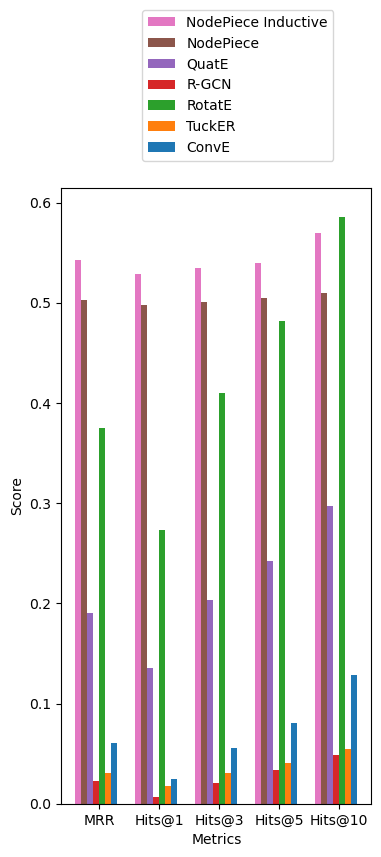

\begin{table}[ht!]
\centering
\caption{Models' IO head prediction performance on min policy.}
\label{tab:classic_head_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.060614 &  0.024316 &   0.05559 &   0.08044 &  0.128689 \\
TuckER              &  0.030713 &  0.017587 &  0.030356 &  0.041061 &   0.05429 \\
RotatE              &  0.374865 &   0.27336 &  0.409849 &  0.481725 &   0.58564 \\
R-GCN               &  0.022372 &  0.006576 &  0.020263 &  0.033491 &  0.048249 \\
QuatE               &  0.190184 &  0.135954 &  0.203395 &  0.242468 &  0.296834 \\
NodePiece           &  0.502886 &  0.498012 &  0.500841 &   0.50497 &  0.509711 \\
NodePiece Inductive &  0.542285 &  0.528848 &  0.535006 &  0.539795 &  0.570125 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.060614,0.030713,0.374865,0.022372,0.190184,0.003877,0.023523
1,Hits@1,0.024316,0.017587,0.273360,0.006576,0.135954,0.000076,0.011631
2,Hits@3,0.055590,0.030356,0.409849,0.020263,0.203395,0.000841,0.014823
3,Hits@5,0.080440,0.041061,0.481725,0.033491,0.242468,0.002065,0.023033
4,Hits@10,0.128689,0.054290,0.585640,0.048249,0.296834,0.005047,0.031015


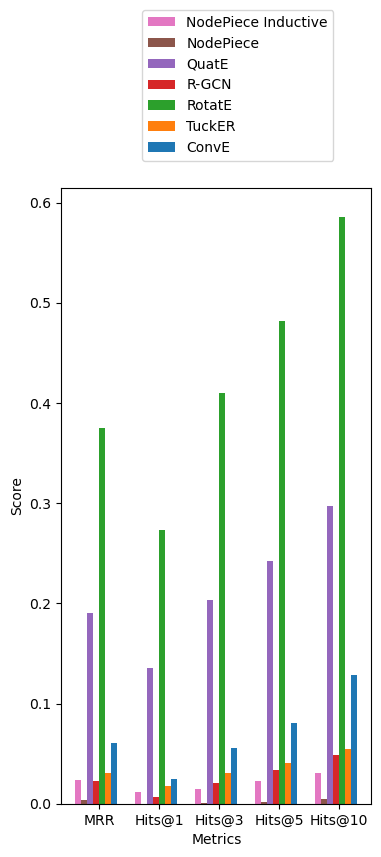

\begin{table}[ht!]
\centering
\caption{Models' IO head prediction performance on average policy.}
\label{tab:classic_head_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.060614 &  0.024316 &   0.05559 &   0.08044 &  0.128689 \\
TuckER              &  0.030713 &  0.017587 &  0.030356 &  0.041061 &   0.05429 \\
RotatE              &  0.374865 &   0.27336 &  0.409849 &  0.481725 &   0.58564 \\
R-GCN               &  0.022372 &  0.006576 &  0.020263 &  0.033491 &  0.048249 \\
QuatE               &  0.190184 &  0.135954 &  0.203395 &  0.242468 &  0.296834 \\
NodePiece           &  0.003877 &  0.000076 &  0.000841 &  0.002065 &  0.005047 \\
NodePiece Inductive &  0.023523 &  0.011631 &  0.014823 &  0.023033 &  0.031015 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.060614,0.030713,0.374865,0.022372,0.190184,0.002858,0.022376
1,Hits@1,0.024316,0.017587,0.273360,0.006576,0.135954,0.000076,0.011631
2,Hits@3,0.055590,0.030356,0.409849,0.020263,0.203395,0.000612,0.014823
3,Hits@5,0.080440,0.041061,0.481725,0.033491,0.242468,0.001759,0.019612
4,Hits@10,0.128689,0.054290,0.585640,0.048249,0.296834,0.002906,0.030787


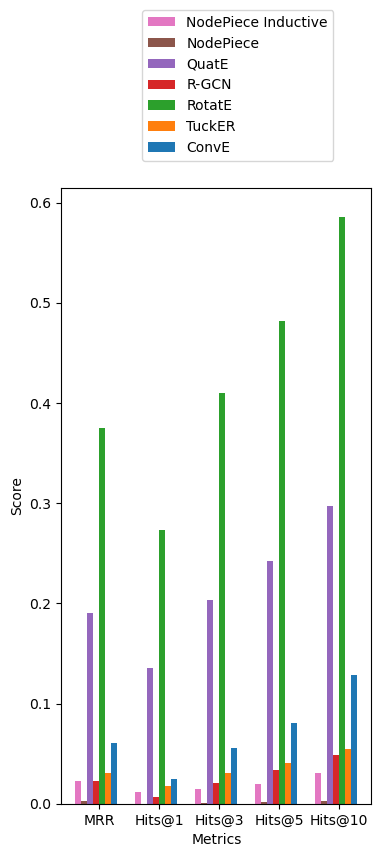

\begin{table}[ht!]
\centering
\caption{Models' IO head prediction performance on max policy.}
\label{tab:classic_head_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.060614 &  0.024316 &   0.05559 &   0.08044 &  0.128689 \\
TuckER              &  0.030713 &  0.017587 &  0.030356 &  0.041061 &   0.05429 \\
RotatE              &  0.374865 &   0.27336 &  0.409849 &  0.481725 &   0.58564 \\
R-GCN               &  0.022372 &  0.006576 &  0.020263 &  0.033491 &  0.048249 \\
QuatE               &  0.190184 &  0.135954 &  0.203395 &  0.242468 &  0.296834 \\
NodePiece           &  0.002858 &  0.000076 &  0.000612 &  0.001759 &  0.002906 \\
NodePiece Inductive &  0.022376 &  0.011631 &  0.014823 &  0.019612 &  0.030787 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.113596,0.001546,0.475520,0.010761,0.273876,0.027764,0.056790
1,Hits@1,0.054596,0.000459,0.374828,0.003135,0.202783,0.014758,0.019156
2,Hits@3,0.117449,0.001300,0.538920,0.007952,0.304022,0.023551,0.064766
3,Hits@5,0.153617,0.001912,0.589693,0.010476,0.347989,0.041214,0.069555
4,Hits@10,0.221823,0.002676,0.652317,0.025998,0.406714,0.052225,0.111745


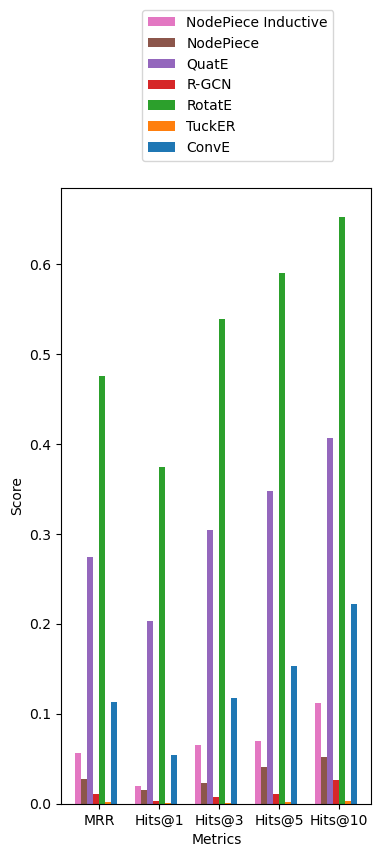

\begin{table}[ht!]
\centering
\caption{Models' IO tail prediction performance on min policy.}
\label{tab:classic_tail_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.113596 &  0.054596 &  0.117449 &  0.153617 &  0.221823 \\
TuckER              &  0.001546 &  0.000459 &    0.0013 &  0.001912 &  0.002676 \\
RotatE              &   0.47552 &  0.374828 &   0.53892 &  0.589693 &  0.652317 \\
R-GCN               &  0.010761 &  0.003135 &  0.007952 &  0.010476 &  0.025998 \\
QuatE               &  0.273876 &  0.202783 &  0.304022 &  0.347989 &  0.406714 \\
NodePiece           &  0.027764 &  0.014758 &  0.023551 &  0.041214 &  0.052225 \\
NodePiece Inductive &   0.05679 &  0.019156 &  0.064766 &  0.069555 &  0.111745 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.113596,0.001546,0.475520,0.010761,0.273876,0.013557,0.049593
1,Hits@1,0.054596,0.000459,0.374828,0.003135,0.202783,0.004358,0.018016
2,Hits@3,0.117449,0.001300,0.538920,0.007952,0.304022,0.013075,0.040821
3,Hits@5,0.153617,0.001912,0.589693,0.010476,0.347989,0.015063,0.048803
4,Hits@10,0.221823,0.002676,0.652317,0.025998,0.406714,0.021334,0.093957


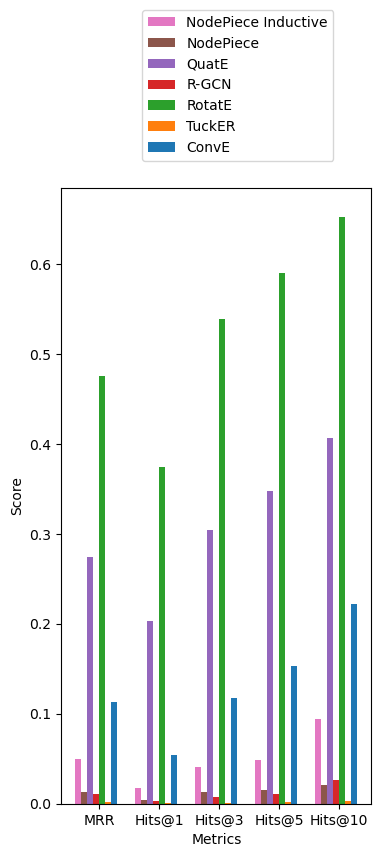

\begin{table}[ht!]
\centering
\caption{Models' IO tail prediction performance on average policy.}
\label{tab:classic_tail_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.113596 &  0.054596 &  0.117449 &  0.153617 &  0.221823 \\
TuckER              &  0.001546 &  0.000459 &    0.0013 &  0.001912 &  0.002676 \\
RotatE              &   0.47552 &  0.374828 &   0.53892 &  0.589693 &  0.652317 \\
R-GCN               &  0.010761 &  0.003135 &  0.007952 &  0.010476 &  0.025998 \\
QuatE               &  0.273876 &  0.202783 &  0.304022 &  0.347989 &  0.406714 \\
NodePiece           &  0.013557 &  0.004358 &  0.013075 &  0.015063 &  0.021334 \\
NodePiece Inductive &  0.049593 &  0.018016 &  0.040821 &  0.048803 &  0.093957 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.113596,0.001546,0.475520,0.010761,0.273876,0.011206,0.047618
1,Hits@1,0.054596,0.000459,0.374828,0.003135,0.202783,0.004358,0.018016
2,Hits@3,0.117449,0.001300,0.538920,0.007952,0.304022,0.006041,0.040593
3,Hits@5,0.153617,0.001912,0.589693,0.010476,0.347989,0.013534,0.045154
4,Hits@10,0.221823,0.002676,0.652317,0.025998,0.406714,0.019040,0.093501


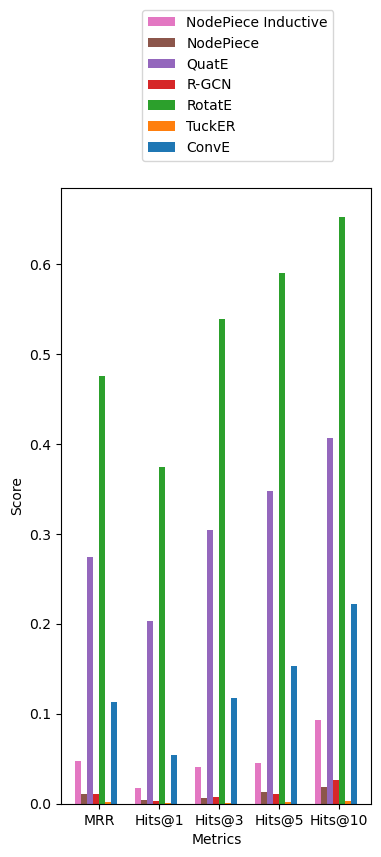

\begin{table}[ht!]
\centering
\caption{Models' IO tail prediction performance on max policy.}
\label{tab:classic_tail_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.113596 &  0.054596 &  0.117449 &  0.153617 &  0.221823 \\
TuckER              &  0.001546 &  0.000459 &    0.0013 &  0.001912 &  0.002676 \\
RotatE              &   0.47552 &  0.374828 &   0.53892 &  0.589693 &  0.652317 \\
R-GCN               &  0.010761 &  0.003135 &  0.007952 &  0.010476 &  0.025998 \\
QuatE               &  0.273876 &  0.202783 &  0.304022 &  0.347989 &  0.406714 \\
NodePiece           &  0.011206 &  0.004358 &  0.006041 &  0.013534 &   0.01904 \\
NodePiece Inductive &  0.047618 &  0.018016 &  0.040593 &  0.045154 &  0.093501 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive,AnyBURL
0,MRR,0.087105,0.016129,0.425193,0.016566,0.232030,0.265325,0.299538,0.5384
1,Hits@1,0.039456,0.009023,0.324094,0.004855,0.169368,0.256385,0.274002,0.4546
2,Hits@3,0.086519,0.015828,0.474384,0.014108,0.253709,0.262196,0.299886,0.5808
4,Hits@10,0.175256,0.028483,0.618978,0.037123,0.351774,0.280968,0.340935,0.6968


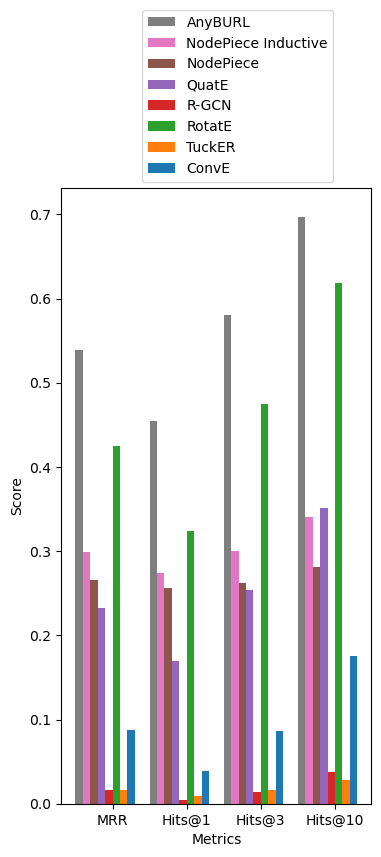

\begin{table}[ht!]
\centering
\caption{Models' IO both prediction performance on min policy.}
\label{tab:classic_both_min}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &   Hits@10 \\
ConvE               &  0.087105 &  0.039456 &  0.086519 &  0.175256 \\
TuckER              &  0.016129 &  0.009023 &  0.015828 &  0.028483 \\
RotatE              &  0.425193 &  0.324094 &  0.474384 &  0.618978 \\
R-GCN               &  0.016566 &  0.004855 &  0.014108 &  0.037123 \\
QuatE               &   0.23203 &  0.169368 &  0.253709 &  0.351774 \\
NodePiece           &  0.265325 &  0.256385 &  0.262196 &  0.280968 \\
NodePiece Inductive &  0.299538 &  0.274002 &  0.299886 &  0.340935 \\
AnyBURL             &    0.5384 &    0.4546 &    0.5808 &    0.6968 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.087105,0.016129,0.425193,0.016566,0.232030,0.008717,0.036558
1,Hits@1,0.039456,0.009023,0.324094,0.004855,0.169368,0.002217,0.014823
2,Hits@3,0.086519,0.015828,0.474384,0.014108,0.253709,0.006958,0.027822
3,Hits@5,0.117029,0.021486,0.535709,0.021983,0.295229,0.008564,0.035918
4,Hits@10,0.175256,0.028483,0.618978,0.037123,0.351774,0.013190,0.062486


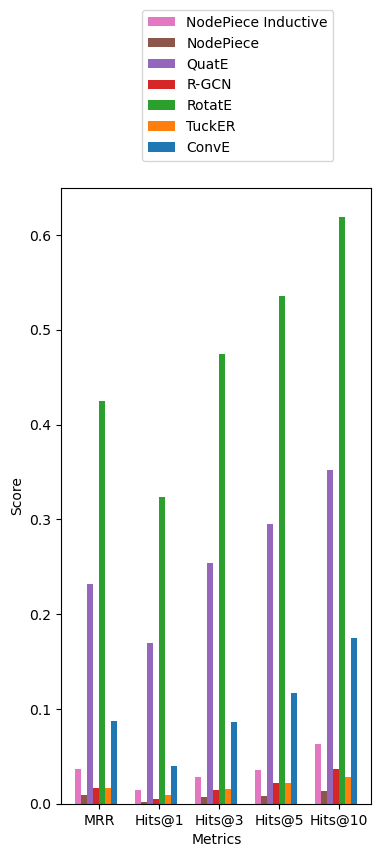

/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


\begin{table}[ht!]
\centering
\caption{Models' IO both prediction performance on average policy.}
\label{tab:classic_both_average}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.087105 &  0.039456 &  0.086519 &  0.117029 &  0.175256 \\
TuckER              &  0.016129 &  0.009023 &  0.015828 &  0.021486 &  0.028483 \\
RotatE              &  0.425193 &  0.324094 &  0.474384 &  0.535709 &  0.618978 \\
R-GCN               &  0.016566 &  0.004855 &  0.014108 &  0.021983 &  0.037123 \\
QuatE               &   0.23203 &  0.169368 &  0.253709 &  0.295229 &  0.351774 \\
NodePiece           &  0.008717 &  0.002217 &  0.006958 &  0.008564 &   0.01319 \\
NodePiece Inductive &  0.036558 &  0.014823 &  0.027822 &  0.035918 &  0.062486 \\
\bottomrule
\end{tabular}
\end{table}



,Metric,ConvE,TuckER,RotatE,R-GCN,QuatE,NodePiece,NodePiece Inductive
0,MRR,0.087105,0.016129,0.425193,0.016566,0.232030,0.007032,0.034997
1,Hits@1,0.039456,0.009023,0.324094,0.004855,0.169368,0.002217,0.014823
2,Hits@3,0.086519,0.015828,0.474384,0.014108,0.253709,0.003326,0.027708
3,Hits@5,0.117029,0.021486,0.535709,0.021983,0.295229,0.007646,0.032383
4,Hits@10,0.175256,0.028483,0.618978,0.037123,0.351774,0.010973,0.062144


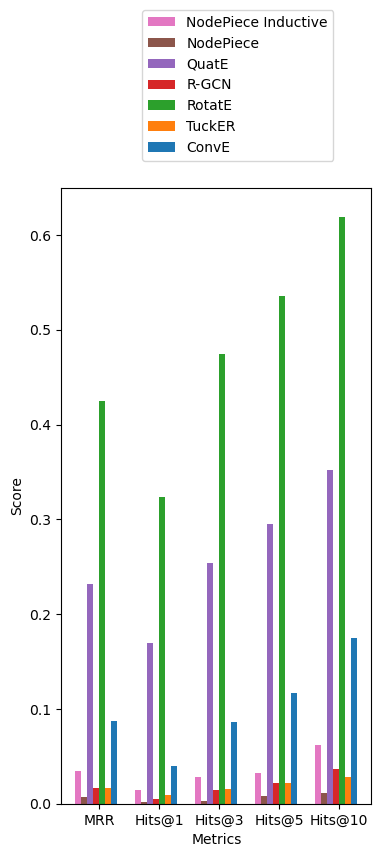

\begin{table}[ht!]
\centering
\caption{Models' IO both prediction performance on max policy.}
\label{tab:classic_both_max}
\begin{tabular}{p{0.2\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth} p{0.1\textwidth}}
\toprule
Metric              &       MRR &    Hits@1 &    Hits@3 &    Hits@5 &   Hits@10 \\
ConvE               &  0.087105 &  0.039456 &  0.086519 &  0.117029 &  0.175256 \\
TuckER              &  0.016129 &  0.009023 &  0.015828 &  0.021486 &  0.028483 \\
RotatE              &  0.425193 &  0.324094 &  0.474384 &  0.535709 &  0.618978 \\
R-GCN               &  0.016566 &  0.004855 &  0.014108 &  0.021983 &  0.037123 \\
QuatE               &   0.23203 &  0.169368 &  0.253709 &  0.295229 &  0.351774 \\
NodePiece           &  0.007032 &  0.002217 &  0.003326 &  0.007646 &  0.010973 \\
NodePiece Inductive &  0.034997 &  0.014823 &  0.027708 &  0.032383 &  0.062144 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_28658/258503074.py:58: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(testing_df.T.to_latex( #hrules=True,


In [62]:
for pred_type in ['head','tail','both']:
    for policy in ['optimistic', 'realistic','pessimistic']:
        plot_test_io(pred_type,policy)

In [63]:
def plot_inference_time_io():
    information = 'testing evaluation duration'
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph/anyburl_io_entire_graph/anyburl_io_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl_io'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    information_df.rename(columns=column_dict,inplace=True)
#     display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    information_df = information_df/11202 #size of the test set 
#     information_df['Mean RT'] = 10.59 * 1e-3
    information_df['Median RT'] = 1e-3
    information_df['NodePiece Inductive'] = information_df['NodePiece Inductive']*11202/3903 #size of inductive test set 
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={"testing evaluation duration":"Testing time per trace (s)"},inplace=True)

#     display(information_df)
#     information_df.plot()
    plt.figure(figsize=(4, 4))
    barlist = plt.bar(names,np.array(information_df["Testing time per trace (s)"]))
    barlist[-1].set_color('r')
#     barlist[-2].set_color('orange')
#     plt.plot(list(information_df.loc[0]))
#     plt.hist(list(information_df.loc[0]))
#     plt.hlines(1e-3,xmin=-0.5,xmax=len(information_df)-0.5,colors="r")
    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Inference time per trace IO (s)')
    plt.ylabel('Seconds')
    plt.show()
    
    return information_df

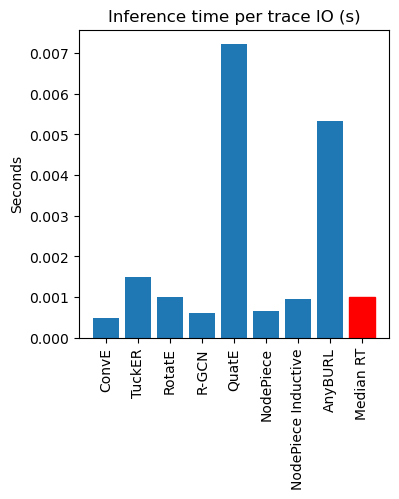

,Testing time per trace (s)
ConvE,0.000497
TuckER,0.001503
RotatE,0.001014
R-GCN,0.000607
QuatE,0.007215
NodePiece,0.000670
NodePiece Inductive,0.000958
AnyBURL,0.005321
Median RT,0.001000


In [64]:
plot_inference_time_io()

In [65]:
def plot_param_bytes():
    information = 'parameters bytes'
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph/anyburl_io_entire_graph/anyburl_io_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl_io'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    
    information_df.rename(columns=column_dict,inplace=True)
#     display(information_df)
    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Memory usage (B)"},inplace=True)


#     display(information_df)
    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Memory usage (B)"])/1e6)

    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Memory usage IO (MB)')
    plt.ylabel('Megabytes')
    plt.show()
    
    return information_df

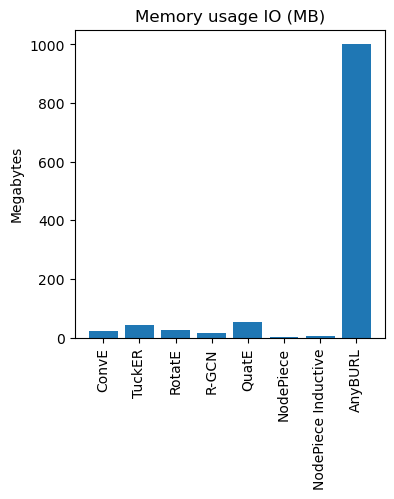

,Memory usage (B)
ConvE,2.153212e+07
TuckER,4.516480e+07
RotatE,2.632320e+07
R-GCN,1.540358e+07
QuatE,5.264640e+07
NodePiece,9.760000e+05
NodePiece Inductive,6.736000e+06
AnyBURL,1.000000e+09


In [66]:
plot_param_bytes()

In [67]:
def plot_training_duration_io():
    information = 'training duration'
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph/anyburl_io_entire_graph/anyburl_io_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl_io'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    information_df.rename(columns=column_dict,inplace=True)

    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Training duration (s)"},inplace=True)



    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Training duration (s)"]))

    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Training time IO (s)')
    plt.ylabel('Seconds')
    plt.show()
    
    return information_df

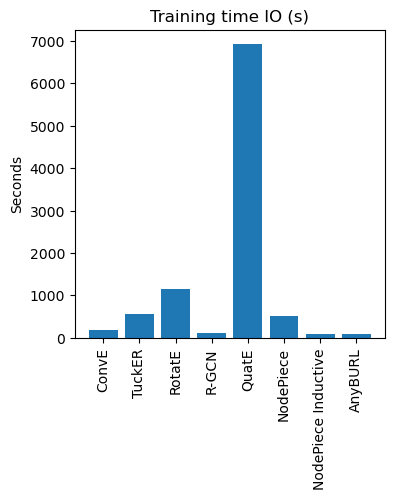

,Training duration (s)
ConvE,177.053970
TuckER,565.462341
RotatE,1140.167969
R-GCN,100.870674
QuatE,6916.271973
NodePiece,524.637207
NodePiece Inductive,94.182655
AnyBURL,100.000000


In [68]:
plot_training_duration_io()

In [69]:
def plot_number_parameters_io():
    information = 'number parameters'
    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
    
    temp_df = pd.read_csv(f'AnyBURL-23-1-sources/src/anyburl_io_entire_graph/anyburl_io_entire_graph/anyburl_io_information.csv')
    temp_df = temp_df[temp_df['name']==information].rename(columns={'value':'anyburl_io'}).drop(columns=['Unnamed: 0'],axis=1)
    information_df_list.append(temp_df)
    information_df = information_df_list[0]
    
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    information_df.rename(columns=column_dict,inplace=True)
    information_df['AnyBURL'] = 501865 # the reported table was wrong

    for column in information_df.columns:
        information_df[column] = information_df[column].astype('float32')
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    information_df = information_df.rename(columns={column:information})
    information_df.rename(columns={information:"Number of parameters"},inplace=True)



    plt.figure(figsize=(4, 4))
    plt.bar(names,np.array(information_df["Number of parameters"]))

    x_values =names
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.title(f'Number of parameters IO')
    plt.ylabel('Number of parameters')
    plt.show()
    
    return information_df

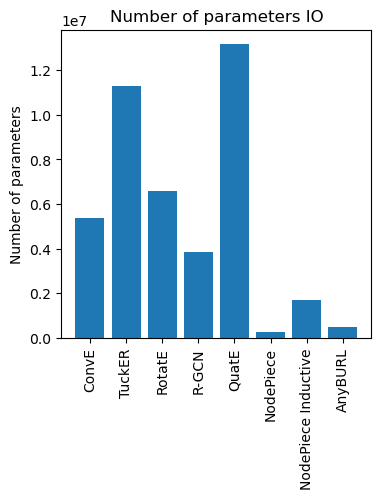

,Number of parameters
ConvE,5383030.0
TuckER,11291200.0
RotatE,6580800.0
R-GCN,3850896.0
QuatE,13161600.0
NodePiece,244000.0
NodePiece Inductive,1684000.0
AnyBURL,501865.0


In [70]:
plot_number_parameters_io()

,Metric,RotatE
0,MRR,0.700570
1,Hits@1,0.519785
2,Hits@3,0.870816
3,Hits@5,0.955840
4,Hits@10,0.986114


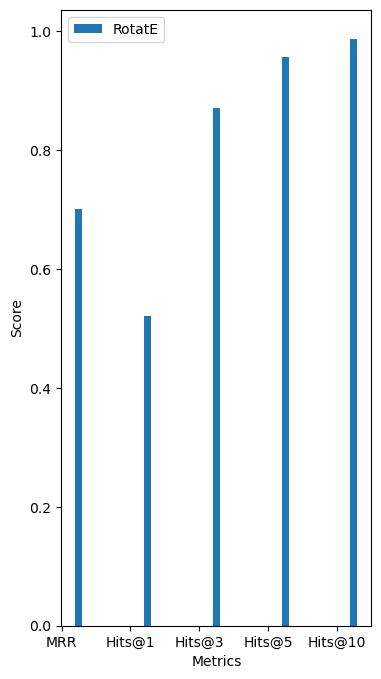

In [71]:
model_name_list = ['rotatE_transductive_sampling']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'Sampling/Testing Traces/{model_name}_testing_traces.zip'
    extract_dir =f'Sampling/Testing Traces/{model_name}_testing_traces'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
traces_testing_df_list = []
for model_name in model_name_list:
    traces_testing_df_list.append(pd.read_csv(f'Sampling/Testing Traces/{model_name}_testing_traces/{model_name}_testing_traces/mean_trace_test_metrics.csv')
                                  .drop(columns=['pessimistic','optimistic'],axis = 1).rename(columns={'Unnamed: 0':'metric','realistic':model_name}))
    

traces_testing_df = traces_testing_df_list[0]

for i in range(1, len(traces_testing_df_list)):
    traces_testing_df = pd.merge(traces_testing_df,traces_testing_df_list[i],on='metric')
    
traces_testing_df['metric'] = ["MRR","Hits@1","Hits@3","Hits@5","Hits@10"]
column_dict = {"rotatE_transductive_sampling":"RotatE",'metric':"Metric"}
traces_testing_df.rename(columns=column_dict,inplace=True)
display(traces_testing_df)

models = list(traces_testing_df)[1:]
X_axis = np.arange(len(traces_testing_df)) +0.25
plt.figure(figsize=(4, 8))
for i in range(len(models)):
    plt.bar(X_axis - 0.1*i,traces_testing_df[models[i]], 0.1, label = models[i])
  
x_values = traces_testing_df['Metric']
plt.xticks(np.arange(0,len(x_values)), x_values)
plt.xlabel("Metrics")
plt.ylabel("Score")
# plt.title("RotatE' use-case performance on avg policy")
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles,labels)
plt.show()